In [1]:
import keras
import tensorflow.keras as tk
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

In [2]:
# read data
(x_train, y_train), (x_test, y_test) = tk.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# train data shape
print("train data shape", x_train.shape)
print("test data shape", x_test.shape)

train data shape (60000, 28, 28)
test data shape (10000, 28, 28)


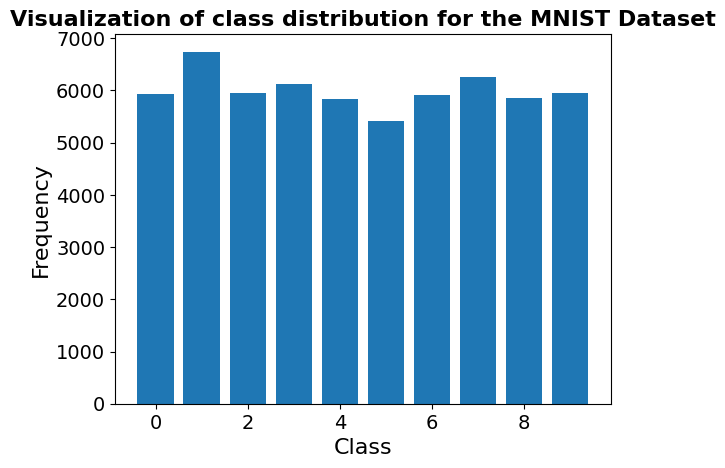

In [4]:
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.title('Visualization of class distribution for the MNIST Dataset', fontsize=16, weight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Class', fontsize=16)
plt.ylabel('Frequency', fontsize=16);

Train Images with number


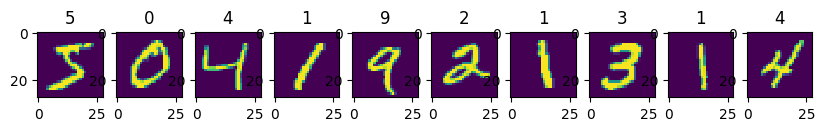

In [5]:
# train data
print("Train Images with number")
from matplotlib import pyplot as plt
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(10, 1))
for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.imshow(x_train[i], interpolation='nearest')
    plt.title(y_train[i])
plt.show()

In [6]:
# preprocessing
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [7]:
# Create KNN model and fit model with training data
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [8]:
y_pred = clf.predict(x_test)

In [9]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8781


In [10]:
# Confusion Matrix
print("Confusion Matrix")
print(confusion_matrix(y_pred, y_test))

Confusion Matrix
[[ 915    0   15   11    5   13   16    2   10   14]
 [   0 1090    7    5    2    7    3   12    7    2]
 [   4    8  879   29    7    3   15   26   29   11]
 [   8   11   33  865    5   50   10   13   41   20]
 [   5    1   14    7  866    6   22    6   17   41]
 [  11    6    9   37    8  751   20    6   27    8]
 [  14    8   11    4   14   23  842    4   16    9]
 [   4    1   24    9   11    6    2  929   10   20]
 [   8    9   30   23   21   21   24    9  788   28]
 [  11    1   10   20   43   12    4   21   29  856]]


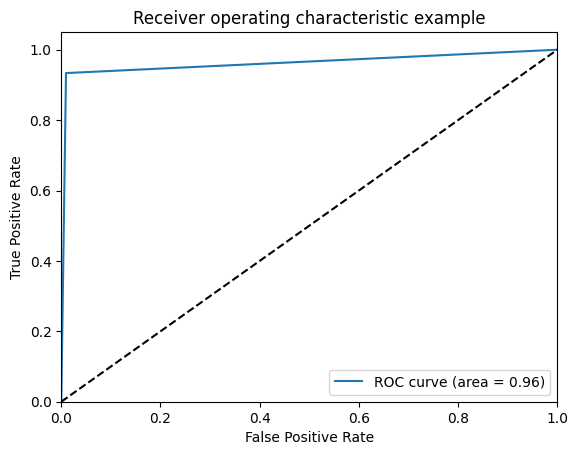

In [16]:
# y_test expand
y_test_temp = []
for i in range(len(y_test)):
  other = []
  for j in range(10):
    if j == y_test[i]:
      other.append(1)
    else:
      other.append(0)
  y_test_temp.append(other)

# y_pred expand
y_pred_temp = []
for i in range(len(y_pred)):
  other = []
  for j in range(10):
    if j == y_pred[i]:
      other.append(1)
    else:
      other.append(0)
  y_pred_temp.append(other)

y_test_temp = np.array(y_test_temp)
y_pred_temp = np.array(y_pred_temp)

# ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
  fpr[i], tpr[i], _ = roc_curve(y_test_temp[:, i], y_pred_temp[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
